In [11]:
import reeds 
import pygromos
from reeds.function_libs.file_management import file_management as fM

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from pygromos.files.imd import Imd


In [12]:
def get_data_for_correct_timesteps(distances):
    
    new_data = distances[500:2500] # removes equil
    
    for i in range(1, 5):
        imin = 2500*i + 500
        imax = imin + 2000
        
        new_data = np.append(new_data, distances[imin:imax], axis=0)
    return new_data
    
def subsample_maxContrib(array, idx_subsample):
    return [array[int(i)] for i in idx_subsample] 

In [13]:
# sampling thresholds 

openff_thresholds = [-371, -321, -595, -250, -341, -574]

gaff_thresholds = [ -350, -337, -641, -260, -318, -577]

num_states = len(openff_thresholds)


In [14]:
path = os.getcwd()+'/data_for_plots/nik/dofs'

# Load distances from file

In [15]:
duplicates = []
for i in range(1, 51):
    #print (i*250 + i)
    duplicates.append(i*250 + i -1)

all_openff_dists = np.genfromtxt(f'{path}/distances_side_chain_openff.tsv')
all_openff_dists  = np.delete(all_openff_dists.T, duplicates, axis=1)
all_openff_dists = get_data_for_correct_timesteps(all_openff_dists.T)

# Note time (axis 0 is not adjusted)
np.shape(all_openff_dists)



duplicates = []
for i in range(1, 51):
    #print (i*250 + i)
    duplicates.append(i*250 + i -1)


all_gaff_dists = np.genfromtxt(f'{path}/distances_side_chain_gaff.tsv')
all_gaff_dists  = np.delete(all_gaff_dists.T, duplicates, axis=1)
all_gaff_dists = get_data_for_correct_timesteps(all_gaff_dists.T)

# Note time (axis 0 is not adjusted)
print(np.shape(all_gaff_dists))
print (np.shape(all_openff_dists))

(10000, 3)
(10000, 3)


In [16]:
duplicates = []
for i in range(1, 41):
    #print (i*250 + i)
    duplicates.append(i*250 + i -1)

all_openff_nh2dists = np.genfromtxt(f'{path}/distances_nh2_openff.tsv')
all_openff_nh2dists  = np.delete(all_openff_nh2dists.T, duplicates, axis=1).T

openff_nh2dists = np.min(all_openff_nh2dists.T[1:].T, axis=1)


duplicates = []
for i in range(1, 41):
    #print (i*250 + i)
    duplicates.append(i*250 + i -1)

all_gaff_nh2dists = np.genfromtxt(f'{path}/distances_nh2_gaff.tsv')
all_gaff_nh2dists  = np.delete(all_gaff_nh2dists.T, duplicates, axis=1).T

gaff_nh2dists = np.min(all_gaff_nh2dists.T[1:].T, axis=1)

# Load sampling to subsample for specific state 
## (we don't do this for paper figure) was just a test

In [17]:
# Doing it with the maxContrib criterion instead
vis = ['e1', 'e2', 'e3', 'e4', 'e5', 'e6']


data_dir = os.getcwd()+'/data_for_plots/nik/ene_trajs'

imd = Imd(f'{data_dir}/NIK_complex_openff.imd')
eoff_off = np.array(imd.REPLICA_EDS.EIR, dtype=float).T[0]

print (eoff_off)

traj_openff = pd.concat([fM.parse_csv_energy_trajectory(data_dir + f'/NIK_complex_openff_seed_{seed}.dat') for seed in range(1, 6)])
traj_openff = traj_openff[2500:] # remove equil



for state, eoff in zip(vis, eoff_off):
    traj_openff[state] -= eoff

mins_openff = np.argmin(np.array(traj_openff[vis]), axis=1)
idx_sampled_openff = [np.where(mins_openff == i) for i in range(0, 6)]


##### --------------------

imd = Imd(f'{data_dir}/NIK_complex_gaff.imd')
eoff_gaff = np.array(imd.REPLICA_EDS.EIR, dtype=float).T[0]

print (eoff_gaff)

traj_gaff = pd.concat([fM.parse_csv_energy_trajectory(data_dir + f'/NIK_complex_gaff_seed_{seed}.dat') for seed in range(1, 6)])
traj_gaff = traj_gaff[2500:] # remove equil

for state, eoff in zip(vis, eoff_gaff):
    traj_gaff[state] -= eoff

mins_gaff = np.argmin(np.array(traj_gaff[vis]), axis=1)
idx_sampled_gaff = [np.where(mins_gaff == i) for i in range(0, 6)]



[   0.    144.09 -113.06  238.46  145.85 -107.38]
[   0.    142.95 -124.03  233.47  152.4  -100.6 ]


# Load Dihedral Angles

In [18]:
def mod2pi(v):
     return np.degrees(np.mod(np.radians(v), 2*np.pi))
    
duplicates = []
for i in range(1, 41):
    #print (i*250 + i)
    duplicates.append(i*250 + i -1)

openff_dihedral_l1 = np.genfromtxt(f'{path}/dihedral_ligand1_openff.tsv')
openff_dihedral_l1  = np.delete(openff_dihedral_l1.T, duplicates, axis=1)    

duplicates = []
for i in range(1, 51):
    #print (i*250 + i)
    duplicates.append(i*250 + i -1)

dihedral_ligand1_gaff = np.genfromtxt(f'{path}/dihedral_ligand1_gaff.tsv')
dihedral_ligand1_gaff  = np.delete(dihedral_ligand1_gaff.T , duplicates, axis=1)
dihedral_ligand1_gaff = dihedral_ligand1_gaff.T[2500:].T


# Plot 

/tmp/ipykernel_3036941/3207458491.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


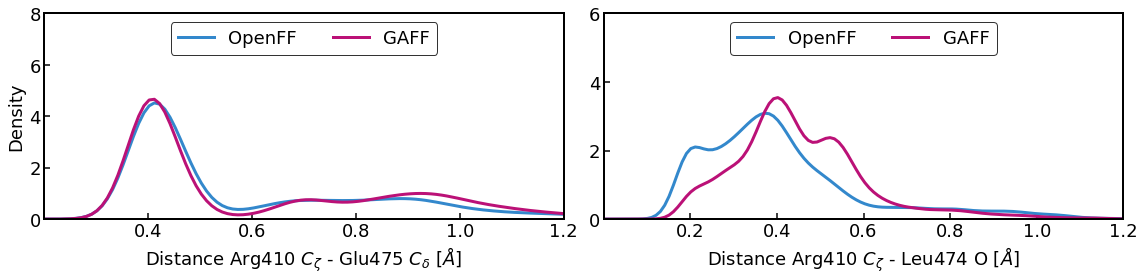

In [19]:
import scipy.stats as stats
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16, 4])


full = True
dashed = False

state = 6


nbins = 200

density = stats.gaussian_kde(all_openff_dists.T[1])
n, x, _ = ax[0].hist(all_openff_dists.T[1], bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#3388cc', linewidth = 0)  


if full:
    ax[0].plot(x, density(x), color = '#3388cc', label = 'OpenFF', lw = 3)


density = stats.gaussian_kde(all_openff_dists[idx_sampled_openff[state-1]].T[1])
n, x, _ = ax[0].hist(all_openff_dists[idx_sampled_openff[state-1]].T[1], bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#3388cc', linewidth = 0)  

if dashed:
    ax[0].plot(x, density(x), color = '#3388cc', ls='--', lw = 2)




density = stats.gaussian_kde(all_gaff_dists.T[1])
n, x, _ = ax[0].hist(all_gaff_dists.T[1], bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#bb1177', linewidth = 0)  

if full:
    ax[0].plot(x, density(x), color = '#bb1177', label = 'GAFF', lw =3)


density = stats.gaussian_kde(all_gaff_dists[idx_sampled_gaff[state-1]].T[1])
n, x, _ = ax[0].hist(all_gaff_dists[idx_sampled_gaff[state-1]].T[1], bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#bb1177', linewidth = 0)  

if dashed:
    ax[0].plot(x, density(x), color = '#bb1177', ls='--', lw = 2)




##### -----------------------------------------------------------------------------

density = stats.gaussian_kde(openff_nh2dists)
n, x, _ = ax[1].hist(openff_nh2dists, bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#3388cc', linewidth = 0)  

if full:
    ax[1].plot(x, density(x), color = '#3388cc', label = 'OpenFF', lw=3)

density = stats.gaussian_kde(openff_nh2dists[idx_sampled_openff[state-1]])
n, x, _ = ax[1].hist(openff_nh2dists[idx_sampled_openff[state-1]], bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#3388cc', linewidth = 0)  

if dashed:
    ax[1].plot(x, density(x), color = '#3388cc', ls='--', lw = 2)


density = stats.gaussian_kde(gaff_nh2dists)
n, x, _ = ax[1].hist(gaff_nh2dists, bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#bb1177', linewidth = 0)  

if full:
    ax[1].plot(x, density(x), color = '#bb1177', label = 'GAFF', lw=3)


density = stats.gaussian_kde(gaff_nh2dists[idx_sampled_gaff[state-1]])
n, x, _ = ax[1].hist(gaff_nh2dists[idx_sampled_gaff[state-1]], bins=np.linspace(0, 2, nbins), 
                   histtype=u'step', density=True, color = '#bb1177', linewidth = 0)  

if dashed:
    pass
    ax[1].plot(x, density(x), color = '#bb1177', ls='--', lw = 2)



fig.tight_layout()

ax[0].legend(loc='upper center', fancybox=True, fontsize = 18, ncol=2, edgecolor='black')
ax[1].legend(loc='upper center', fancybox=True, fontsize = 18, ncol=2, edgecolor='black')


ax[0].set_xlabel(f'Distance Arg410 $C_\zeta$ - Glu475 $C_\delta$ [$\AA$]', fontsize = 18)
ax[1].set_xlabel(f'Distance Arg410 $C_\zeta$ - Leu474 O [$\AA$]', fontsize = 18)


ax[0].set_xticks([0, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4 ])

ax[0].set_yticks(np.arange(0, 15, 2))


ax[1].set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4 ])

ax[0].set_xlim([0.2, 1.2])
ax[1].set_xlim([0., 1.2])

ax[0].set_ylim([0, 8])
ax[1].set_ylim([0, 6])


ax[0].tick_params(labelsize=18) 
ax[1].tick_params(labelsize=18)

ax[0].set_ylabel('Density',  fontsize = 18)

fontsize = 18

ax[0].tick_params(axis="both",direction="in", length = 6, width = 1.5, labelsize=fontsize)
ax[1].tick_params(axis="both",direction="in", length = 6, width = 1.5, labelsize=fontsize)

for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_linewidth(2)

    
#fig.suptitle(f'State {state}', fontsize=fontsize)

fig.tight_layout()


In [20]:
# fig.savefig('/home/cchampion/Desktop/distances.png', facecolor='white', dpi=300)

# Compare to TI

In [21]:
ti_lig1_dists = np.genfromtxt(f'{path}/from_ti/distances_lig1.tsv')
ti_lig2_dists = np.genfromtxt(f'{path}/from_ti/distances_lig2.tsv')
ti_lig3_dists = np.genfromtxt(f'{path}/from_ti/distances_lig3.tsv')

ti_lig4_dists = np.genfromtxt(f'{path}/from_ti/distances_lig4.tsv')
ti_lig5_dists = np.genfromtxt(f'{path}/from_ti/distances_lig5.tsv')
ti_lig6_dists = np.genfromtxt(f'{path}/from_ti/distances_lig6.tsv')

In [22]:
ti_dists = [ti_lig1_dists, ti_lig2_dists, ti_lig3_dists, ti_lig4_dists, ti_lig5_dists, ti_lig6_dists]

Text(0.5, 0.98, 'Arg410 motion in TI simulations')

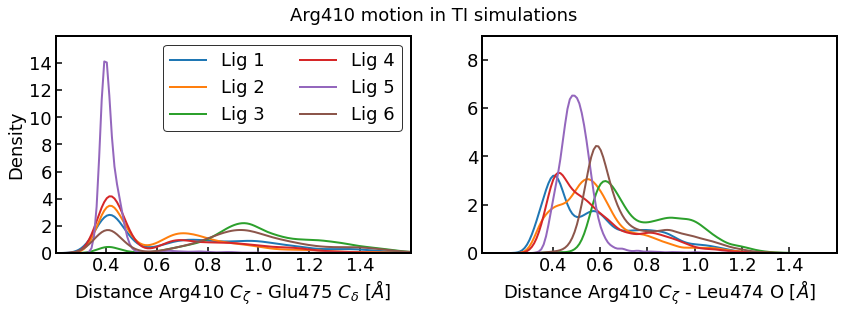

In [23]:
from cycler import cycler


fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [14, 4])

nbins = 200

for i, dists in enumerate(ti_dists):
    density = stats.gaussian_kde(dists.T[1])
    n, x, _ = ax[0].hist(dists.T[1], bins=np.linspace(0, 2, nbins), 
                       histtype=u'step', density=True, color = '#bb1177', linewidth = 0)  

    ax[0].plot(x, density(x), label = f'Lig {i+1}', lw=2)

    ### 

    density = stats.gaussian_kde(dists.T[2])
    n, x, _ = ax[1].hist(dists.T[2], bins=np.linspace(0, 2, nbins), 
                       histtype=u'step', density=True, color = '#bb1177', linewidth = 0)  

    ax[1].plot(x, density(x), label = f'Lig {i+1}', lw=2)

    ### 

ax[0].legend(loc='upper right', fancybox=True, fontsize = 18, ncol=2, edgecolor='black')

ax[0].set_xticks([0, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4 ])

ax[0].set_yticks(np.arange(0, 15, 2))


ax[1].set_xticks([0, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4 ])

ax[0].set_xlim([0.2, 1.6])
ax[1].set_xlim([0.1, 1.6])

ax[0].set_ylim([0, 16])
ax[1].set_ylim([0, 9])

ax[0].set_xlabel(f'Distance Arg410 $C_\zeta$ - Glu475 $C_\delta$ [$\AA$]', fontsize = 18)
ax[1].set_xlabel(f'Distance Arg410 $C_\zeta$ - Leu474 O [$\AA$]', fontsize = 18)

fontsize = 18

ax[0].tick_params(axis="both",direction="in", length = 6, width = 1.5, labelsize=fontsize)
ax[1].tick_params(axis="both",direction="in", length = 6, width = 1.5, labelsize=fontsize)

for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_linewidth(2)

ax[0].set_ylabel('Density',  fontsize = 18)
    
fig.suptitle('Arg410 motion in TI simulations', fontsize = 18)
    

In [24]:
# fig.savefig('/home/cchampion/Desktop/distances_ti.png', facecolor='white', dpi=300, bbox_inches='tight', pad_inches=0.25)